# Naive Bayes

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns

In [85]:
df=pd.read_csv('weight-height.csv')
df

,Cinsiyet,Kilo,Boy
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


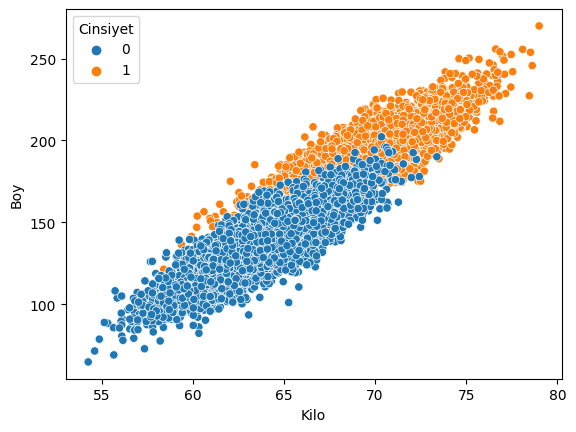

In [86]:
fig = sns.scatterplot(data=df, x='Kilo',y='Boy',hue='Cinsiyet')

In [87]:
def splitting(mydata, ratio):
    train_size = int(len(mydata) * ratio)
    train_index=np.random.choice(range(0,len(mydata)),replace=False,size=train_size)
    train=mydata.iloc[train_index]
    test=mydata[~mydata.index.isin(train_index)]
    return train,test

In [88]:
train,test=splitting(mydata=df, ratio=0.8)

In [89]:
train

,Cinsiyet,Kilo,Boy
8009,0,63.341910,126.839225
3849,1,70.254847,213.903063
8760,0,67.713758,157.220898
122,1,66.949342,164.439146
5470,0,63.221907,140.272834
...,...,...,...
6202,0,63.118588,122.115106
678,1,63.546370,150.346658
9481,0,67.726674,154.362795
5942,0,61.739037,127.160584


In [90]:
test

,Cinsiyet,Kilo,Boy
3,1,71.730978,220.042470
25,1,68.144033,192.343977
28,1,67.421242,175.213922
32,1,71.528216,195.032243
36,1,69.076171,197.488243
...,...,...,...
9990,0,63.179498,141.266100
9991,0,62.636675,102.853563
9993,0,60.030434,97.687432
9994,0,59.098250,110.529686


In [91]:
y_train=train['Cinsiyet']
x_train=train.drop('Cinsiyet',axis=1)

In [92]:
y_train

8009    0
3849    1
8760    0
122     1
5470    0
       ..
6202    0
678     1
9481    0
5942    0
5404    0
Name: Cinsiyet, Length: 8000, dtype: int64

In [93]:
x_train

,Kilo,Boy
8009,63.341910,126.839225
3849,70.254847,213.903063
8760,67.713758,157.220898
122,66.949342,164.439146
5470,63.221907,140.272834
...,...,...
6202,63.118588,122.115106
678,63.546370,150.346658
9481,67.726674,154.362795
5942,61.739037,127.160584


In [94]:
# P(y)
def Py(y):
    p_y=[]
    for i in np.sort(y.unique()):
        pyi=len(y[y==i])/len(y)
        p_y.append(pyi)
    return p_y

In [95]:
class_probs=Py(y_train)
class_probs

[0.503625, 0.496375]

In [96]:
def calculate_mean_std(x,y):
    means=[]
    std=[]
    for i in np.sort(y.unique()):
        means_i=x[y==i].mean()
        sd_i=x[y==i].std()
        means.append(means_i)
        std.append(sd_i)
    return means,std 

In [97]:
means,std=calculate_mean_std(x_train,y_train)
means

[Kilo     63.707275
 Boy     135.903501
 dtype: float64,
 Kilo     69.023124
 Boy     187.043769
 dtype: float64]

In [98]:
std

[Kilo     2.696655
 Boy     18.933959
 dtype: float64,
 Kilo     2.859186
 Boy     19.768383
 dtype: float64]

In [99]:
# Gauss Olasılık Yoğunluk Fonksiyonu P(x|y)'yi hesaplayın
def calculateGaussianProbability(x, mean, stdev):
    expo = np.exp(-(np.power(x - mean, 2) / (2 * np.power(stdev, 2))))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * expo

In [100]:
x_test=test.drop('Cinsiyet',axis=1)
x_test

,Kilo,Boy
3,71.730978,220.042470
25,68.144033,192.343977
28,67.421242,175.213922
32,71.528216,195.032243
36,69.076171,197.488243
...,...,...
9990,63.179498,141.266100
9991,62.636675,102.853563
9993,60.030434,97.687432
9994,59.098250,110.529686


In [101]:
# Calculate Class Probabilities P(y|x)
def calculateClassProbabilities(x,means,sds,class_probs):
    probabilities = []
    for i in range(len(class_probs)):
        numerator=1
        for j in range(len(x.columns)):
            mean_ij=means[i][j]
            sd_ij=sds[i][j]
            fxji=calculateGaussianProbability(x=x.iloc[:,j], mean=mean_ij, stdev=sd_ij)
            numerator=numerator*fxji
        numerator=numerator*class_probs[i]
        probabilities.append(numerator)
    return (probabilities/np.sum(probabilities,axis=0))

In [102]:
calculateClassProbabilities(x_test,means,std,class_probs)

array([[4.36244870e-06, 3.69514062e-03, 6.58946913e-02, ...,
        9.99995501e-01, 9.99987286e-01, 9.68536333e-01],
       [9.99995638e-01, 9.96304859e-01, 9.34105309e-01, ...,
        4.49867096e-06, 1.27144708e-05, 3.14636669e-02]])

In [103]:
def predict(x):
    probabilities=calculateClassProbabilities(x,means,std,class_probs)
    Class=(probabilities[1]>=0.5).astype('int')
    return(Class)

In [104]:
prediction=predict(x_test)

In [105]:
y_test = test["Cinsiyet"]

In [106]:
list(zip(prediction,y_test))

[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 1),
 (1, 1),
 

In [107]:
def compute_accuracy(prediction,test_y):
    return np.mean(prediction==test_y)

In [108]:
compute_accuracy(prediction,test.Cinsiyet)

0.878

## Not So Naive Bayes

In [109]:
def compute_std_correlation_for_each_column(x):
    return (x.std(),x.corr().iloc[0,1])

In [110]:
def calculateGaussianProbability(x,k,means,sds,corr):
    expo = np.exp(-((sds[1]**2)*(x.iloc[:,0]-means[k][0])**2
                    +(sds[0]**2)*(x.iloc[:,1]-means[k][1])**2
                    -2*corr*sds[0]*sds[1]*(x.iloc[:,0]-means[k][0])*(x.iloc[:,1]-means[k][1])) 
                  / (2*(1-corr**2)*(sds[0]**2)*(sds[1])**2))
    return (1 / (2*np.pi*sds[0]*sds[1]*np.sqrt(1-corr**2))) * expo

In [111]:
def compute_accuracy_for_NSNB(prediction,test_y):
    return (1-np.sum(np.abs(prediction-test_y))/len(prediction))*100

In [112]:
def compute_means_for_each_class(x,y):
    means=[]
    for i in np.sort(y.unique()):
        means_i=x[y==i].mean()
        means.append(means_i)
    return means

In [123]:
def not_so_naive_bayes(x_train,x_test,y_train,y_test):
    class_probs=Py(y_train)
    means=compute_means_for_each_class(x_train,y_train)
    stdevs,correlation=compute_std_correlation_for_each_column(x_train)
    
    probabilities=[]
    for i in range(len(class_probs)):
        fi=calculateGaussianProbability(x=x_test,k=i,means=means,sds=stdevs,corr=correlation)
        numerator=fi*class_probs[i]
        probabilities.append(numerator)
    probabilities=probabilities/np.sum(probabilities,axis=0)
    prediction=(probabilities[1]>=0.5).astype('int')
    accuracy=compute_accuracy(prediction,y_test)
    return accuracy,prediction

In [124]:
accuracy,prediction = not_so_naive_bayes(x_train,x_test,y_train,y_test)
accuracy

0.9135